# Ejercicio Práctico

En este ejercicio emplearemos lo aprendido en las 4 sesiones anteriores. Leeremos un archivo de texto plano (.las), lo cargaremos como matriz, haremos algunos cálculos y haremos gráficas con los datos de la matriz. 

Para poder llevar a cabo este ejercicio es necesario tener el archivo CALAMAR-1.las. Si estamos trabajando desde Anaconda, debemos poner este archivo en el directorio de trabajo. Si estamos trabajando en Google Colab, es necesario subir el archivo en el folder /content.

In [1]:
pwd

'/content'

In [ ]:
ls

CALAMAR-1.las  sample_data/


In [ ]:
#Importamos las librerias a usar durante el notebook

import numpy as np
import matplotlib.pylab as plt


In [ ]:
#Leemos los primeros 10000 caracteres para conocer un poco del archivo

fname = 'CALAMAR-1.las'

f = open(fname, 'r')

text = f.read(10000)

print(text)

#------------------------------------------------------------------------------
#
#   Created by  : [OpenWorks] Log Export Utility (LEXP)
#   Created on  : 2006-11-28 10:58:36
#   Project     : GUAJIRAOFF
#   User        : MSUAREZ
#   Interpreter : MSU
#
#------------------------------------------------------------------------------
~VERSION INFORMATION
VERS. 2.0 : CWLS Log ASCII Standard - version 2.0
WRAP.  NO : One line per depth step
~WELL INFORMATION
#MNEMONIC   .UNIT                                           VALUE :DESCRIPTION
#------------------------------------------------------------------------------
STRT        .FT                                          389.7500 :START DEPTH
STOP        .FT                                         8499.7500 :STOP DEPTH
STEP        .FT                                            0.5000 :STEP
NULL        .                                           -999.2500 :NULL VALUE
COMP        .                                               TEXAS :COMPANY

In [ ]:
#Numeramos las líneas, para identificar desde cuál línea empieza la matriz de datos.

fname = 'CALAMAR-1.las'

f = open(fname, 'r')

n = 0
for line in f:
  print(n, line)
  n = n + 1

  if n==70:
    break


0 #------------------------------------------------------------------------------

1 #

2 #   Created by  : [OpenWorks] Log Export Utility (LEXP)

3 #   Created on  : 2006-11-28 10:58:36

4 #   Project     : GUAJIRAOFF

5 #   User        : MSUAREZ

6 #   Interpreter : MSU

7 #

8 #------------------------------------------------------------------------------

9 ~VERSION INFORMATION

10 VERS. 2.0 : CWLS Log ASCII Standard - version 2.0

11 WRAP.  NO : One line per depth step

12 ~WELL INFORMATION

13 #MNEMONIC   .UNIT                                           VALUE :DESCRIPTION

14 #------------------------------------------------------------------------------

15 STRT        .FT                                          389.7500 :START DEPTH

16 STOP        .FT                                         8499.7500 :STOP DEPTH

17 STEP        .FT                                            0.5000 :STEP

18 NULL        .                                           -999.2500 :NULL VALUE

19 COMP 

In [ ]:
f.close()

In [ ]:
#Con el comando np.loadtxt() el archivo que se carga se guarda como matriz

CALAMAR_data = np.loadtxt(fname, skiprows=57)

print(CALAMAR_data[:10])

[[ 3.897500e+02  1.800000e+01 -9.992500e+02 -9.992500e+02 -9.992500e+02
  -9.992500e+02 -9.992500e+02 -9.992500e+02 -9.992500e+02 -9.992500e+02
  -9.992500e+02 -9.992500e+02 -9.992500e+02 -9.992500e+02 -9.992500e+02
  -9.992500e+02 -9.992500e+02 -9.992500e+02]
 [ 3.902500e+02  1.800000e+01 -9.992500e+02 -9.992500e+02  3.902500e+02
   1.761870e+02  2.204350e+01  6.050000e-01 -9.992500e+02  1.210000e+03
   0.000000e+00 -9.992500e+02 -9.992500e+02  0.000000e+00  0.000000e+00
  -9.992500e+02  1.000000e+00 -9.992500e+02]
 [ 3.907500e+02  1.800000e+01 -9.992500e+02 -9.992500e+02  3.907500e+02
   1.764400e+02  2.223950e+01  6.060000e-01 -9.992500e+02  1.210000e+03
   0.000000e+00 -9.992500e+02 -9.992500e+02  0.000000e+00  0.000000e+00
  -9.992500e+02  1.000000e+00 -9.992500e+02]
 [ 3.912500e+02  1.800000e+01 -9.992500e+02 -9.992500e+02  3.912500e+02
   1.767390e+02  2.238150e+01  6.080000e-01 -9.992500e+02  1.210000e+03
   0.000000e+00 -9.992500e+02 -9.992500e+02  0.000000e+00  0.000000e+00
 

In [ ]:
#Veamos una muestra de los datos cargados. Consultemos la primera fila:

CALAMAR_data[0,:]

array([ 389.75,   18.  , -999.25, -999.25, -999.25, -999.25, -999.25,
       -999.25, -999.25, -999.25, -999.25, -999.25, -999.25, -999.25,
       -999.25, -999.25, -999.25, -999.25])

In [ ]:
#A partir de mi gran matriz de datos, extraemos dos arreglos 
#que contengan la profundidad y el GR:

DEPTH = CALAMAR_data[:,0]
GR = CALAMAR_data[:,6]


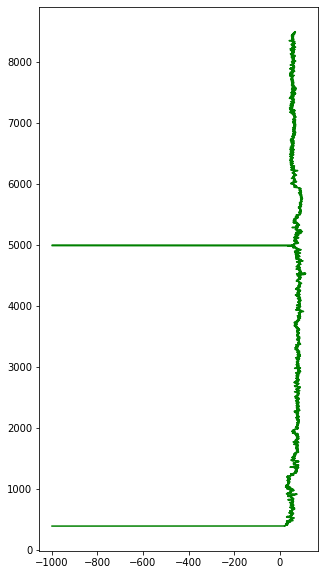

In [ ]:


fig, ax = plt.subplots(figsize=(5,10))
ax.plot(GR, DEPTH, 'g')

In [ ]:
#Los valores de la gráfica anterior presentan valores anómalos, hacemos
#una función que reemplace los valores menores a cero por el promedio
#de todo el registro GR:

n = 0

for i in GR:
  if i < 0:
    GR[n] = np.mean(GR)

  n = n+1


Text(0, 0.5, 'Depth (ft)')

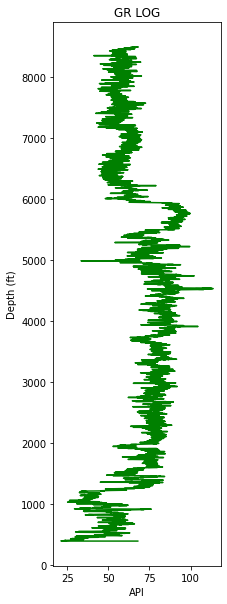

In [ ]:
fig, ax = plt.subplots(figsize=(3,10))
ax.plot(GR, DEPTH, 'g')
ax.set_title('GR LOG')
ax.set_xlabel('API')
ax.set_ylabel('Depth (ft)')

Una vez hemos podido extraer los datos de GR de un archivo .las, ahora hagamos una operación: Calculemos el Vshale a partir del registro:

In [ ]:

GR_min = min(GR)
GR_max = max(GR)

Vshale = (GR-GR_min)/(GR_max - GR_min)

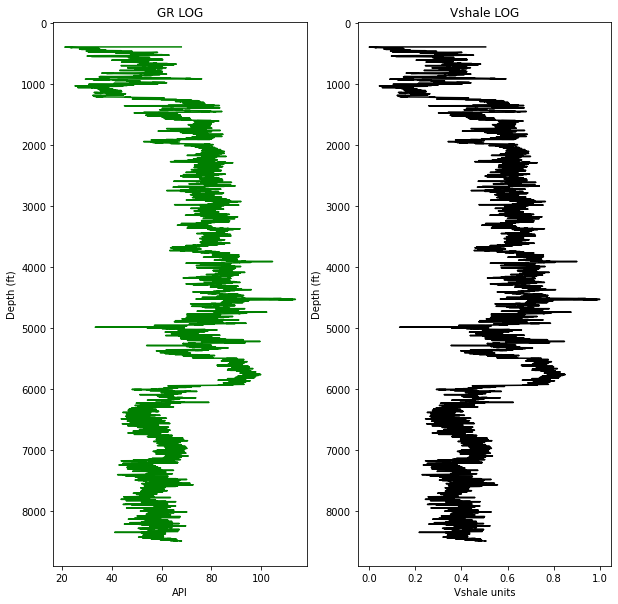

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].plot(GR, DEPTH, 'g')
ax[0].set_title('GR LOG')
ax[0].set_xlabel('API')
ax[0].set_ylabel('Depth (ft)')
ax[0].invert_yaxis()

ax[1].plot(Vshale, DEPTH, 'k')
ax[1].set_title('Vshale LOG')
ax[1].set_xlabel('Vshale units')
ax[1].set_ylabel('Depth (ft)')
ax[1].invert_yaxis()

# Bonus

Hasta ahora hemos visto como leer y manipular un archivo de texto que contiene registros de pozo, a partir de los módulos básicos de Python. Sin embargo, muchos de los datos usados en Geociencias cuentan con librerías específicas de Python que permiten manipularlos de una forma más eficiente. En el caso de los registros de pozos, existe una librería llamada `Welly` creada por la compañía canadiense Agile Geoscience. Veamos un poco de sus funcionalidades:

In [ ]:
!pip install welly


     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 81kB 4.3MB/s 
  Created wheel for welly: filename=welly-0.4.7-cp36-none-any.whl size=51555 sha256=52995f1fbdaafb7d91f32c4e7b2d29328bd809b4bb29050fc670c41a65e42aa1
  Stored in directory: /root/.cache/pip/wheels/1f/a6/e3/8543907612eab77a66ec2193df115c2580fd863bea3c092a44
  Created wheel for striplog: filename=striplog-0.8.5-cp36-none-any.whl size=80744 sha256=2e539666173810740494b2c00099bf680146a3f005400ae4cbd9ac210328927d
  Stored in directory: /root/.cache/pip/wheels/a6/09/bd/87093a5be4a55cc7cacf9668e2dc0f3c905a1621b120af4820
Successfully built welly striplog


In [ ]:
import welly as wll


w = wll.Well.from_las('CALAMAR-1.las') #Con esta línea el archivo queda guardado en la varible w

Header section Parameter regexp=~P was not found.
/usr/local/lib/python3.6/dist-packages/welly/well.py:173: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


In [ ]:
w.data #Consultamos que registros tiene:

{'CAL': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CNS': Curve([    nan,     nan,     nan, ..., 35.937 , 35.6895, 35.2985]),
 'DT': Curve([    nan, 176.187, 176.44 , ...,     nan,     nan,     nan]),
 'GR': Curve([    nan, 22.0435, 22.2395, ..., 67.4705, 67.5655, 67.858 ]),
 'ILD': Curve([   nan, 0.605 , 0.606 , ..., 1.4795, 1.4785, 1.485 ]),
 'ILM': Curve([   nan,    nan,    nan, ..., 1.6545, 1.657 , 1.6685]),
 'LITH': Curve([  nan, 1210., 1210., ..., 1238., 1238., 1238.]),
 'LS': Curve([nan,  0.,  0., ...,  0.,  0.,  0.]),
 'PHI': Curve([nan, nan, nan, ...,  0.,  0.,  0.]),
 'RHOB': Curve([   nan,    nan,    nan, ..., 2.2275, 2.2305, 2.2325]),
 'SHALE': Curve([nan,  0.,  0., ...,  1.,  1.,  1.]),
 'SHALY_SS': Curve([nan,  0.,  0., ...,  0.,  0.,  0.]),
 'SP': Curve([    nan,     nan,     nan, ..., 18.1895, 18.581 , 18.676 ]),
 'SS': Curve([nan,  1.,  1., ...,  0.,  0.,  0.]),
 'TEST': Curve([18., 18., 18., ..., 20., 20., 20.]),
 'VCL': Curve([nan, nan, nan, ...,  1.,  1.,  1.])}

In [ ]:
w.data['GR'] # Ficha explicativa del registro GR

Curve([    nan, 22.0435, 22.2395, ..., 67.4705, 67.5655, 67.858 ])

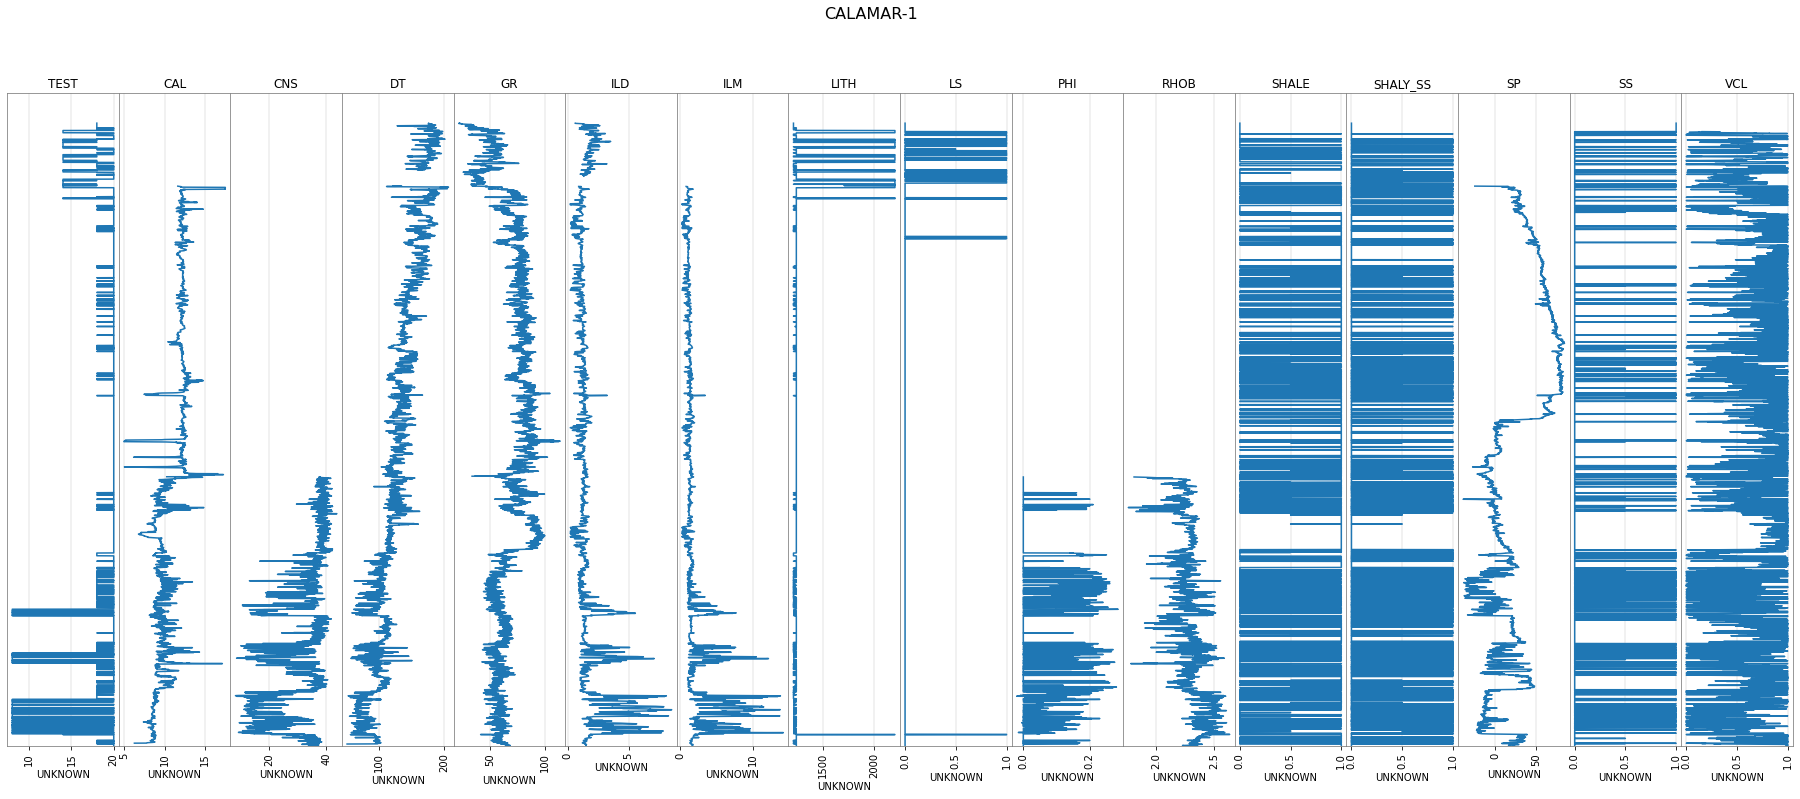

In [ ]:
w.plot() #Con la función plot() visualizamos de forma rápida todos los registros


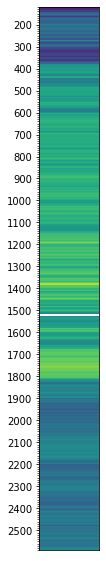

In [ ]:
w.data['GR'].plot_2d() 

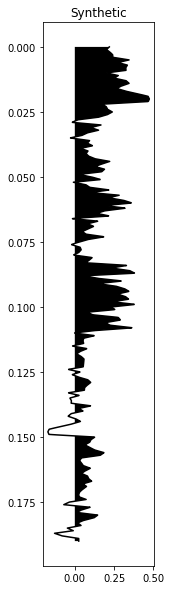

In [ ]:
# Podemos hacer un síntetico preliminar de forma rápida!

w.make_synthetic()


w.data['Synthetic'][500:700].plot()
